In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3

In [2]:
grossdf = pd.read_csv('../../data/bom.movie_gross.csv.gz')
#grossdf.head(5)

In [3]:
budgetdf = pd.read_csv('../../data/tn.movie_budgets.csv.gz')
#budgetdf.head(5)

In [4]:
# Rename the title column to movie for merge with the movie_budget dataframe
grossdf = grossdf.rename(columns={'title': 'movie'})

In [5]:
#connect moviegross and moviebudgets on movie
gross_budgets = pd.merge(grossdf, budgetdf, on= 'movie')

In [6]:
# Have to reformat the worldwide_gross and production_budget columns to remove $ and space
gross_budgets['worldwide_gross'] = gross_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(int)
gross_budgets['production_budget'] = gross_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(int)

In [7]:
# Create a profit column by subtracting production_budget from worldwide_gross
gross_budgets['profit'] = (gross_budgets['worldwide_gross'] - gross_budgets['production_budget'])/1000000

Text(0.5, 1.0, 'Top 10 Studios by Average Profit')

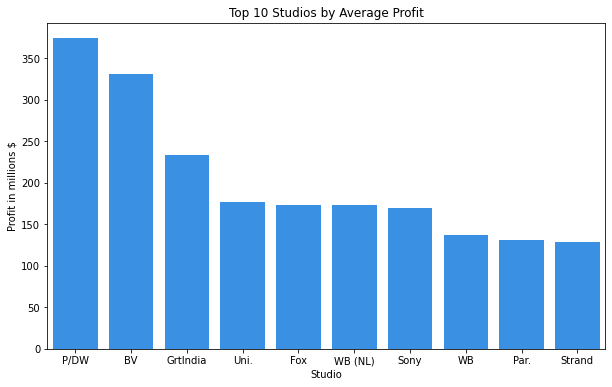

In [8]:
# Plot top 10 - Cleaned up
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='studio', y='profit', data=gross_budgets.groupby('studio')['profit'].mean().nlargest(10).reset_index(), color='dodgerblue')
plt.ylabel('Profit in millions $')
plt.xlabel('Studio')
plt.title('Top 10 Studios by Average Profit')